In [58]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,Y_test) = fashion_mnist.load_data()

In [42]:
# checking the shape and type
print(f"The shape is {X_train_full.shape}")
print(f"The type is {X_train_full.dtype}")

The shape is (60000, 28, 28)
The type is uint8


In [43]:
# splitting into training and validaton sets
# feature scaling as we perform gradient descent

x_valid , x_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:] 

In [44]:
print(f"shape of x_valid is {x_valid.shape} and x_train is {x_train.shape}")
print(f"shape of y_valid is {y_valid.shape} and y_train is {y_train.shape}")

shape of x_valid is (5000, 28, 28) and x_train is (55000, 28, 28)
shape of y_valid is (5000,) and y_train is (55000,)


In [45]:
y_train[0]

4

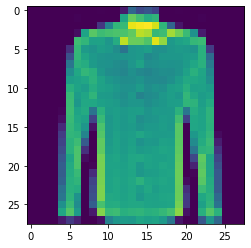

In [46]:
plt.imshow(x_train[15])

In [47]:
#initializing the model 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#to flatten the image array
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [50]:
# working with getting accessing models layers
print(model.layers)
# getting name of the layer
print("--------------------------------------------------")
hidden1 = model.layers[1]
print(f"The name of layer is {hidden1.name}")

#model.get_layer('dense') is hidden1 #gives true if it is present in hidden1

[<tensorflow.python.keras.layers.core.Flatten object at 0x000001ECF724C6A0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001ECF724CE50>, <tensorflow.python.keras.layers.core.Dense object at 0x000001ECF724CE20>, <tensorflow.python.keras.layers.core.Dense object at 0x000001ECF722EFA0>]
--------------------------------------------------
The name of layer is dense_9


In [51]:
# accessing parametres of the layers

print("Hidden-layer-1")
print()
weights , biases = hidden1.get_weights()
print(weights)
print()
print(f"the shape of weights is {weights.shape}")
print()
print(biases)
print(f"the shape of biases is {biases.shape}")

Hidden-layer-1

[[-0.0276931   0.06566155  0.01371287 ... -0.00980476 -0.01877291
  -0.06529008]
 [-0.05423157 -0.00511491 -0.00967193 ... -0.05600275 -0.01506334
  -0.04580575]
 [-0.06156272 -0.02692136 -0.05240711 ...  0.05959566  0.03718443
  -0.03612713]
 ...
 [ 0.00950442 -0.06603494 -0.00135782 ...  0.00548925  0.0143862
   0.03996406]
 [-0.00678992 -0.02459813  0.04880161 ... -0.01556864  0.03567297
  -0.06233316]
 [ 0.07215357  0.02586418 -0.05891374 ... -0.00370366  0.02852374
  -0.03469294]]

the shape of weights is (784, 300)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [53]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9799 - accuracy: 0.6935 - val_loss: 0.5305 - val_accuracy: 0.8156
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4970 - accuracy: 0.8293 - val_loss: 0.4453 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8421 - val_loss: 0.4427 - val_accuracy: 0.8446
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4196 - accuracy: 0.8523 - val_loss: 0.3897 - val_accuracy: 0.8692
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.3939 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8676 - val_loss: 0.3957 - val_accuracy: 0.8588
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3667 - accuracy: 0.8696 - val_loss: 0.3622 - val_accuracy:

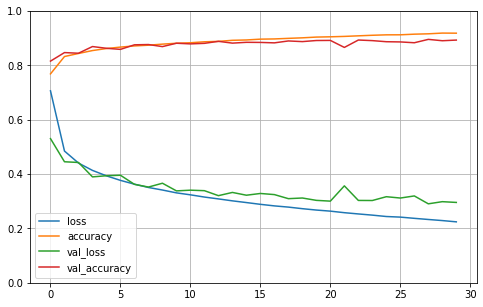

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #setting the vertical range to (0-1)
plt.show()

In [55]:
# evaluating the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.4989 - accuracy: 0.8564


[59.498905181884766, 0.8564000129699707]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
class_names = ["Tshirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]
X_new = X_test[:3]
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U10')

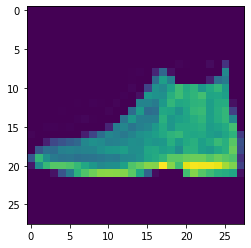

In [63]:
plt.imshow(X_test[0])

<Figure size 576x576 with 0 Axes>

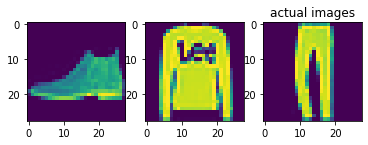

In [76]:
plt.figure(figsize=(8,8))
fig, (axes1,axes2,axes3) = plt.subplots(nrows=1, ncols=3)
plt.title("actual images")
axes1.imshow(X_test[0])
axes2.imshow(X_test[1])
axes3.imshow(X_test[2])
